
### <a href='#Introduction'> 1. Introduction </a>

A key challenge for the insurance industry is to charge each customer an appropriate price for the risk they represent. Risk varies widely from customer to customer, and a deep understanding of different risk factors helps predict the likelihood and cost of insurance claims. The goal of this project is to see how well various statistical methods perform in predicting bodily injury liability Insurance claim payments based on the characteristics of the insured customer’s vehicles for this particular dataset from Emcien Company (https://support.emcien.com/help/sample-data-sets).

### <a href='#Data exploration and visualization'> 2. Data exploration and visualization   </a> 
   - <a href='#Explore dataset'>Explore dataset</a> 
   - <a href='#Visualization'>Visualization</a>
   
### <a href='#Data cleaning'> 3. Data cleaning, Feature selection and Feature engineering </a>
   - <a href='#Null values'>Null values and Outliers</a>
   - <a href='#Correlation analysis'>Correlation analysis</a>
   - <a href='#Transform features'>Transform skewed features</a>
   - <a href='#Encode categorical data'>Encode categorical data</a>   
   
### <a href='#modelling'> 4. Predictive modelling, cross-validation,and ensembling  </a>
   - <a href='#Split'>Split dataset to train and test</a>
   - <a href='#LinearRegression'>LinearRegression</a>
   - <a href='#DecisionTree'>DecisionTree</a>
   - <a href='#RandomForest'>RandomForest</a>
   - <a href='#GradientBoosting'>GradientBoosting</a>
   - <a href='#XGB'>XGB</a>
   - <a href='#Cross-validation'>Cross-validation</a>
   - <a href='#Stacked ensemble'>Stacked ensemble</a>
   
### <a href='#Conclusion'> 5. Conclusion </a>



### <a id='Data exploration and visualization'> 2. Data exploration and visualization   </a> 

### <a id='Explore dataset'>Explore dataset</a>

In [192]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import xgboost as xgb
from matplotlib import pyplot
from xgboost import plot_importance

data=pd.read_csv('/Users/yuyizhen/Downloads/auto_insure_datasets/Auto_Insurance_Claims_Sample.csv')
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [126]:
# descriptive statistics
data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<a id='the_destination'></a>

### <a id='Visualization'>Visualization</a>

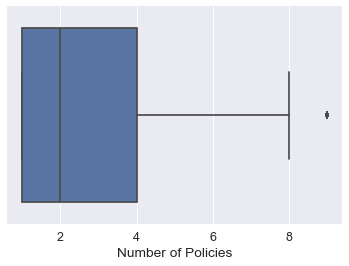

In [219]:
sns.boxplot(x=data['Number of Policies'])
plt.show()


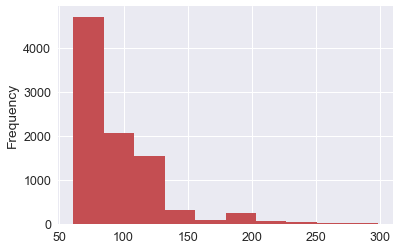

In [224]:
data['Monthly Premium Auto'].plot.hist()
plt.show()

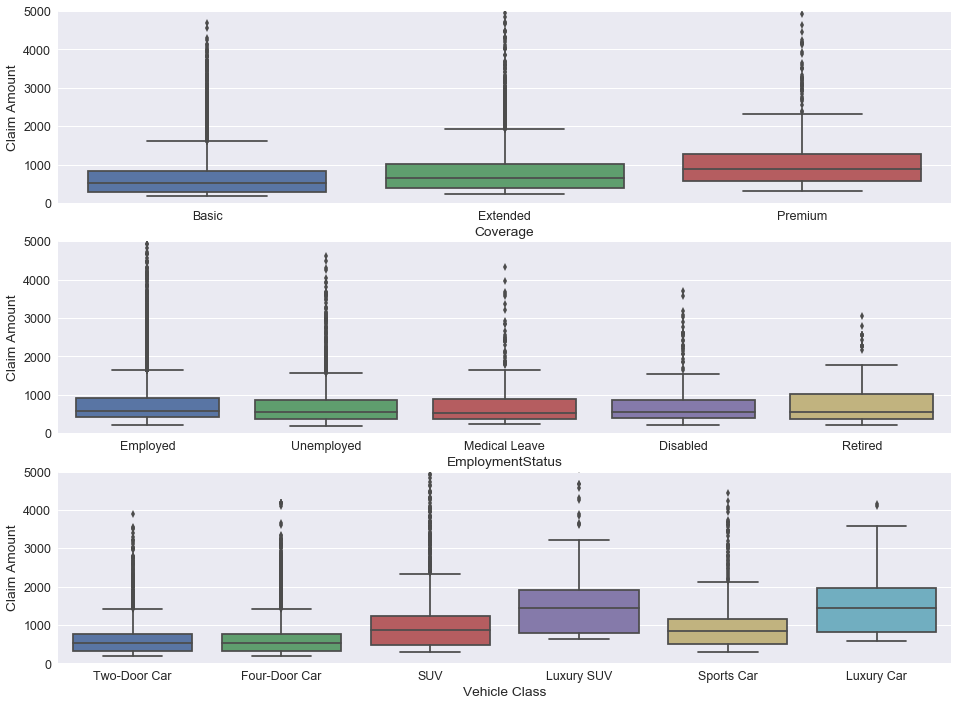

In [225]:
fig, ax = plt.subplots(3, 1, figsize = (16, 12))
ax[0].set_ylim(0,5000)
ax[1].set_ylim(0,5000)
ax[2].set_ylim(0,5000)
sns.boxplot(x = 'Coverage', y = 'Claim Amount',  data = data,ax=ax[0])
sns.boxplot(x = 'EmploymentStatus', y = 'Claim Amount',  data = data,ax=ax[1])
sns.boxplot(x = 'Vehicle Class', y = 'Claim Amount',  data = data,ax=ax[2])

plt.show()

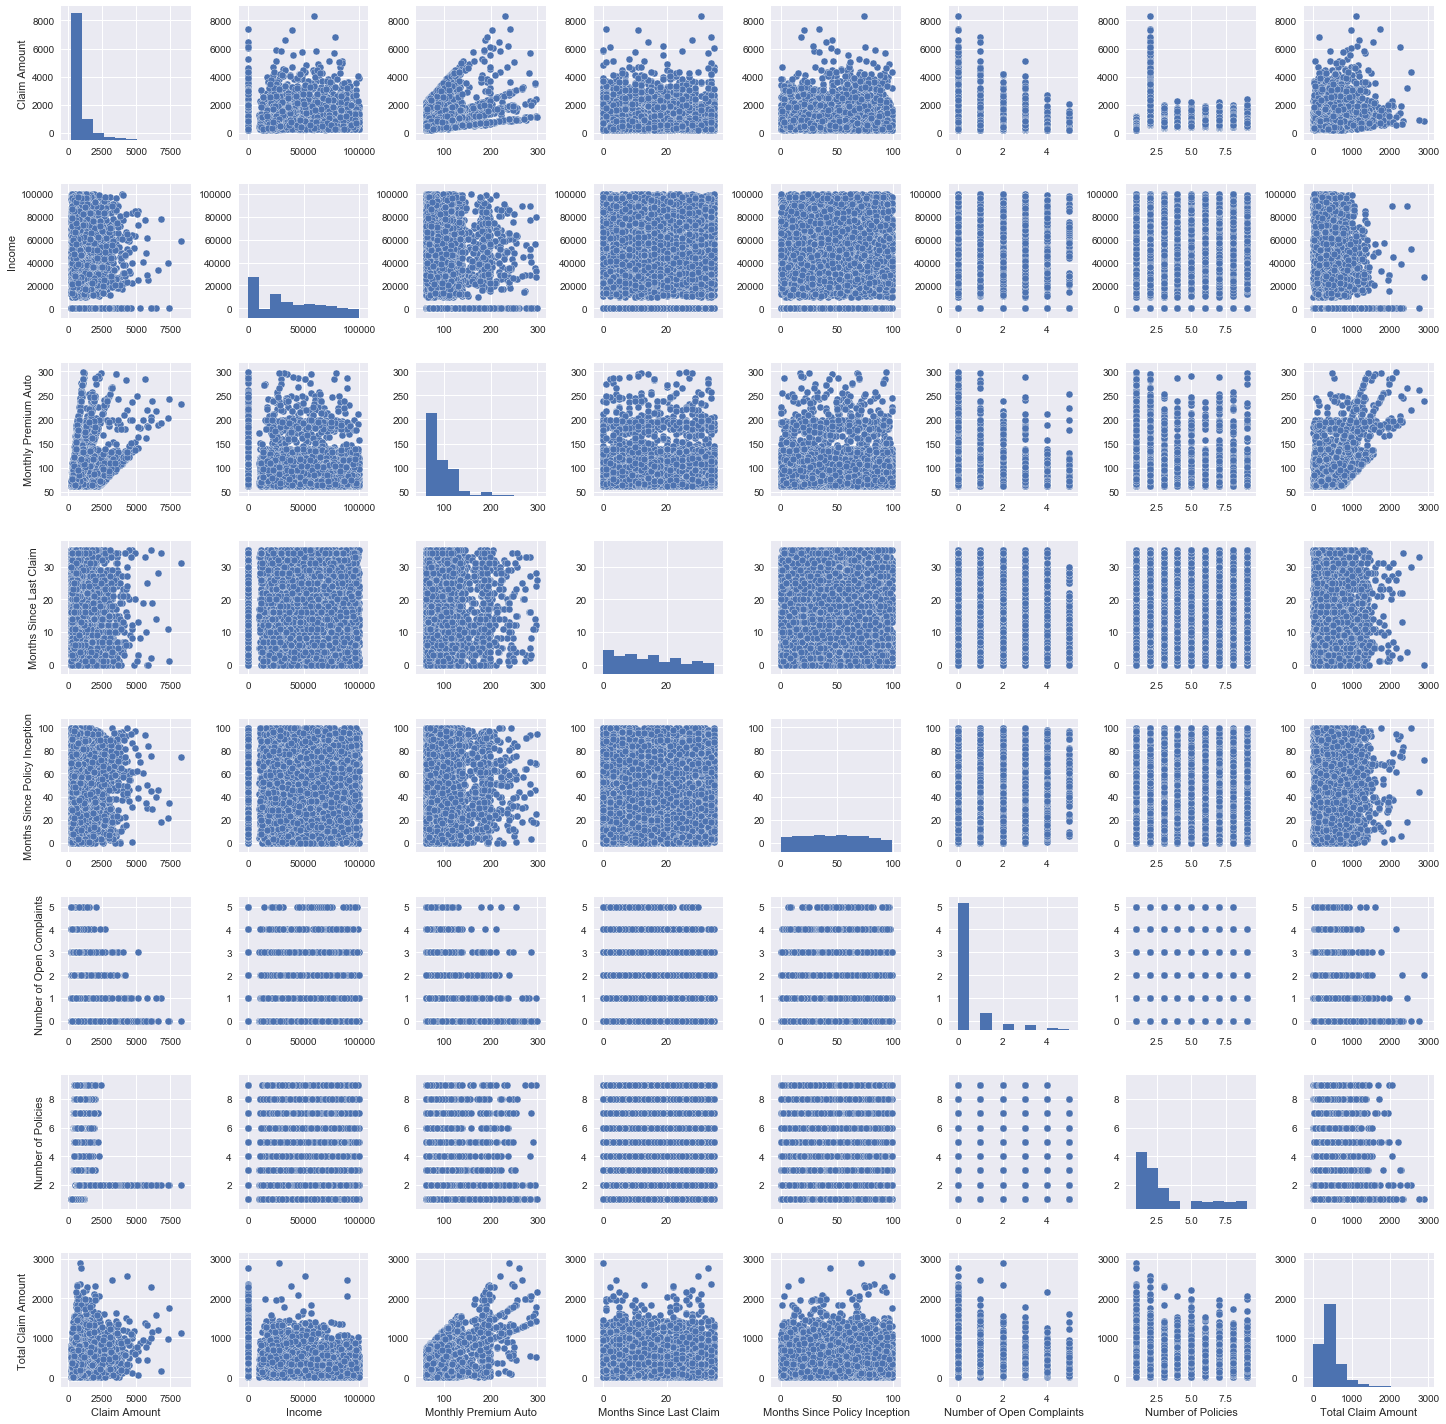

In [129]:
df_numerics_only = data.select_dtypes(include=[np.number])
sns.set()
sns.pairplot(df_numerics_only,size=2.5)
plt.show()

### <a id='Correlation analysis'> Correlaration analysis</a>

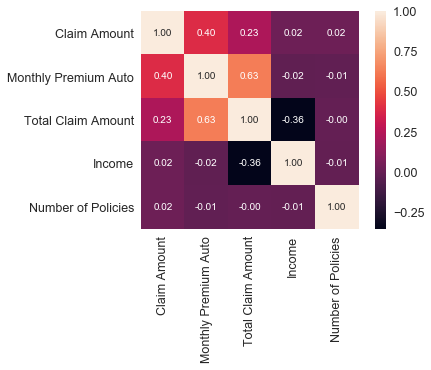

In [130]:
#correlation matrix
k = 5
corrmat = df_numerics_only.corr()
cols = corrmat.nlargest(k, 'Claim Amount')['Claim Amount'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### <a id='Data cleaning'> 3. Data cleaning, Feature selection and Feature engineering </a>

### <a id='Null values'>Check for null values and Outliers</a>

In [132]:
data.isnull().sum()
data=data.drop(data.columns[[1,2,8]], axis=1)

Customer                         0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Remove outliers

In [105]:
#Remove outliers that Zscore is more than 4

#z = np.abs(stats.zscore(df_numerics_only))
#after_remove_outlier=data[(z < 4).all(axis=1)]

### <a id='Transform features'>Transform skewed features</a>

### Target variable


 mu = 800.49 and sigma = 687.06



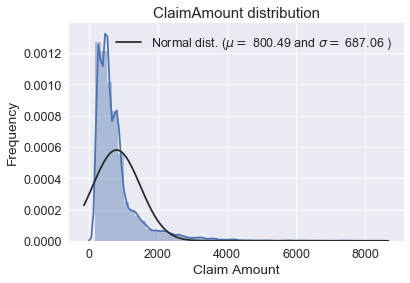

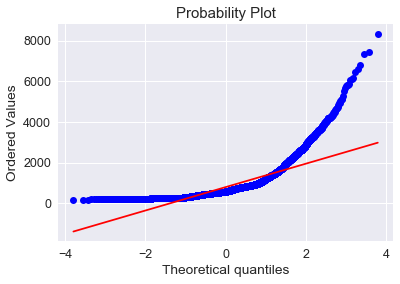

In [133]:
sns.distplot(data['Claim Amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Claim Amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ClaimAmount distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(data['Claim Amount'], plot=plt)
plt.show()

### Log-transformation of the target variable


 mu = 6.45 and sigma = 0.65



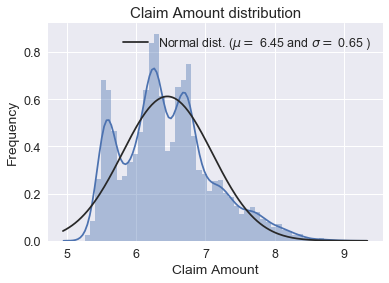

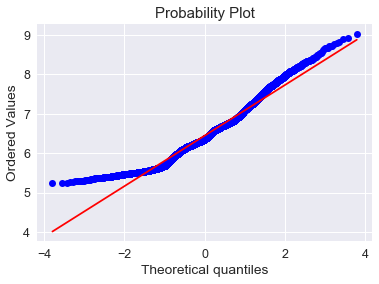

In [134]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data['Claim Amount'] = np.log1p(data['Claim Amount'])

#Check the new distribution 
sns.distplot(data['Claim Amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Claim Amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Claim Amount distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Claim Amount'], plot=plt)
plt.show()

###  Skewed feature

In [135]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Number of Open Complaints,2.782806
Monthly Premium Auto,2.123198
Total Claim Amount,1.714684
Number of Policies,1.253127
Claim Amount,0.578153
Income,0.286840
Months Since Last Claim,0.278541
Months Since Policy Inception,0.040158


In [136]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    data[feat] = boxcox1p(data[feat], lam)
    

There are 8 skewed numerical features to Box Cox transform


### <a id='Encode categorical data'>Encode categorical data</a>

In [137]:
# apply one hot encoding to categorical variables
test = pd.get_dummies(data[data.columns.difference(['Customer'])])
data=pd.concat([data['Customer'], test], axis=1)

### <a id='modelling'> 4. Predictive modelling, cross-validation,and ensembling  </a>

###  <a id='Split'>Split dataset to train and test</a>

In [167]:
target=data['Claim Amount']
df=data.drop('Claim Amount',1)

train, test, y_train, y_test = train_test_split(df, target, test_size=0.25)
train_Customer = train['Customer']
test_Customer = test['Customer']
del train['Customer']
del test['Customer']


print (train.shape, y_train.shape)
print (test.shape, y_test.shape)


(6850, 64) (6850,)
(2284, 64) (2284,)


### <a id='Cross-validation'>Cross Validation</a>


In [160]:
#Validation function
n_folds = 5
    
def rmse_cv_(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return(rmse)

 ### <a id='LinearRegression'>Linear Regression</a>

In [169]:
model = LinearRegression(fit_intercept=True)
score = rmsle_cv(model)
print("linear score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

linear score: 0.0960 (0.0013)



 ### <a id='DecisionTree'>DecisionTree</a>

In [170]:
decision_tree= DecisionTreeRegressor()
score_train=rmsle_cv(decision_tree)
print("decision tree train score: {:.4f} ({:.4f})\n".format(score_train.mean(), score_train.std()))

decision tree train score: 0.0443 (0.0015)



 ### <a id='RandomForest'>RandomForest</a>

In [204]:

forest_model = RandomForestRegressor()
score = rmsle_cv(forest_model)
print("random forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

random forest score: 0.0332 (0.0013)



 ### <a id='GradientBoosting'>GradientBoosting</a>

In [198]:
GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
         max_depth=1, random_state=0, loss='ls')
score = rmsle_cv(GB)
print("Bayesian Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Bayesian Boosting score: 0.0402 (0.0009)



 ### <a id='XGB'>XGB</a>

In [186]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.04, 
                             learning_rate=0.5, max_depth=8, 
                             min_child_weight=1.7, n_estimators=2200,
                             reg_alpha=0.4, reg_lambda=0.85,
                             subsample=0.5, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0350 (0.0008)



###  <a id='Stacked ensemble'>Stacked ensemble</a>

In [174]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [218]:
averaged_models = AveragingModels(models = (decision_tree, forest_model,model_xgb))
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0337 (0.0013)



In [176]:
averaged_models.fit(train.values, y_train)
train_pred = averaged_models.predict(train.values)
pred = np.expm1(averaged_models.predict(test.values))

### Output predicting result to csv file

In [177]:
sub = pd.DataFrame()
sub['Customer'] = test_Customer
sub['Claim Amount'] = pred
sub.to_csv('/Users/yuyizhen/Downloads/submission.csv',index=False)

### Feature Importance 

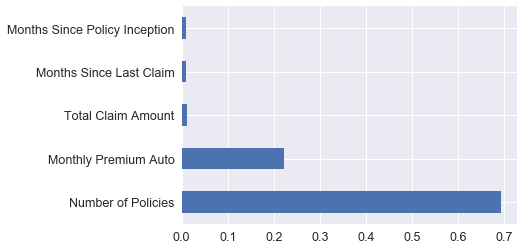

In [216]:
# feature importance according to RF 
forest_model.fit(train,y_train)
importances = forest_model.feature_importances_

feat_importances = pd.Series(forest_model.feature_importances_, index=train.columns)
feat_importances.nlargest(5).plot(kind='barh')
pyplot.show()

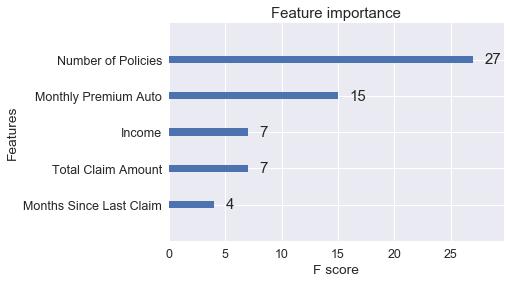

In [217]:
# feature importance according to XGB model
model_xgb.fit(train,y_train)
plot_importance(model_xgb,max_num_features=5)
pyplot.show()

### <a id='Conclusion'> 5. Conclusion </a>

- Among the several methods we have tried, the random forest algorithm has been proven the most efficient model for prediction.

- From the given dataset, the most important influential predictors are related to the number of policies,monthly premium, and total claim amount, etc. For the further development, more information such as driving behaviors and driving history would help the model predicton more accurate.